<a href="https://colab.research.google.com/github/max-cyril/sentiment_analysis/blob/master/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  pre-processing
1-relabel
2- 

In [1]:
import pandas as pd

In [2]:
p=pd.read_json('/content/Electronics_5.json',lines=True)
p.overall.value_counts()

ValueError: ignored

In [3]:
data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',header = None ,engine='python',sep=',',error_bad_lines=False,encoding='latin-1')
data.shape
data.head()

FileNotFoundError: ignored

In [10]:
data.shape

(1600000, 6)

In [11]:
data.columns
data.columns = ['A', 'B','C','D','E','F']


In [12]:
#relabelisation des valeurs de polarité
data.loc[data["A"] == 4,"A"] = 1
data.loc[data["A"] == 0,"A"] = 0

In [13]:
df=data[['A','F']]
df.columns=['polarité','phrases']
df.head()
df.polarité.value_counts()

1    800000
0    800000
Name: polarité, dtype: int64

In [14]:
df.head()


polarité                                            phrases
0         0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1         0  is upset that he can't update his Facebook by ...
2         0  @Kenichan I dived many times for the ball. Man...
3         0    my whole body feels itchy and like its on fire 
4         0  @nationwideclass no, it's not behaving at all....

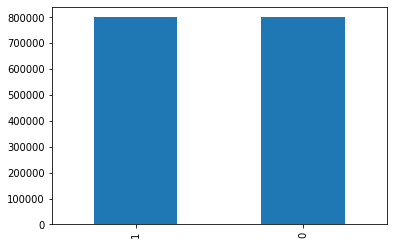

In [15]:
df.polarité.value_counts().plot.bar()
#df.value_counts()

In [32]:
tweet_pos=df[df['polarité']==1].phrases
tweet_pos_140k=tweet_pos[:140000]
print(tweet_pos_140k[0:3]) 
#tweet_pos_75k.describe()
len(tweet_neut_140k)

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
Name: phrases, dtype: object


140000

In [20]:
tweet_neg=df[df['polarité']==0].phrases
tweet_neg_140k=tweet_neg[:140000]
#print(tweet_neg_100k.loc) 
print(tweet_neg_140k[:2])
tweet_neg_140k.shape

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
Name: phrases, dtype: object


(140000,)

In [33]:
tweet_neut=p[p['overall']==3]['reviewText']
tweet_neut_140k=tweet_neut[:140000]
print(len (tweet_neut_140k))
print(tweet_neut_140k[:2])

140000
2     Well, what can I say.  I've had this unit in m...
13    This is a good beefy 2 amp charger, but it cov...
Name: reviewText, dtype: object


In [48]:
import re
#re.split("\n",str(tweet_neg_75k))
#str(tweet_neg_75k)

['0        @switchfoot http://twitpic.com/2y1zl - Awww, t...',
 "1        is upset that he can't update his Facebook by ...",
 '2        @Kenichan I dived many times for the ball. Man...',
 '3          my whole body feels itchy and like its on fire ',
 "4        @nationwideclass no, it's not behaving at all....",
 '                               ...                        ',
 '74995                    is wasting away the bank holiday ',
 '74996    got an A in english again  yay..  but a D- in ...',
 '74997    The office is sooo quiet, I feel sooo lonely, ...',
 '74998    Boohoo to my teams (miami and chicago) being e...',
 '74999    wishing i was in LA right now. also trying to ...',
 'Name: phrases, Length: 75000, dtype: object']

In [15]:
#fonction Removing URL 
def remove_url(tweet):
  """remove html tags from tex,#output type=str#"""
  import re 
  print ("succes!!! ,les tags et sites ont été  enlevés !!!")
  return re.sub(r'http\S+','',tweet)

In [23]:
tweet_neg1 =remove_url(str(tweet_neg_75k))
tweet_pos1 =remove_url(str(tweet_pos_75k))
#tweet_neut1 =remove_url(list(tweet_pos_75k.values.flatten()))

len(tweet_neg1)

succes!!! ,les tags et sites ont été  enlevés !!!
succes!!! ,les tags et sites ont été  enlevés !!!


668

In [ ]:
pip install contractions

In [20]:
#fonction Removing URL 
def data_cleaning(tweet):
  """1-remove html tags from tex,#output type=str#
     2-expand shortened words, e.g. don't to do not
     3-Removing all irrelevant characters (Numbers and Punctuation)[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]
     4-Convert all characters into lowercase
     5-remove accented characters from text, e.g. café
     6- """
  import re 
  #from word2number import w2n
  import contractions
  import nltk
  from unidecode import unidecode
  from nltk.corpus import stopwords
  #tweet=list(tweet.values.flatten())
  tweet=re.sub(r'http\S+',' ',str(tweet))
  print ("succes!!! ,les tags et sites ont été  enlevés !!!")
  #tweet = contractions.fix(tweet)
  print ("succes!!! ,les formes contractées ont été etendues!!!")
  #tweet=re.sub('[^a-zA-Z]',' ',tweet)
  print ("succes!!! ,les caracteres inconvenus ont été  enlevés !!!")
  #tweet=tweet.lower()
  print ("succes!!! ,les caracteres sont en miniscules !!!") 
  #tweet = unidecode(tweet)
  print ("succes!!! ,les caracteres accents ont été  enlevés !!!")

  return tweet

In [ ]:
#pip install contractions
list(tweet_neg_75k)

In [ ]:
str1 = ''.join(str(e) for e in list(tweet_pos_75k.values.flatten()))
#len(list(tweet_pos_75k.values.flatten()))
str1

In [21]:
a=data_cleaning(tweet_pos_75k)
len(a)

succes!!! ,les tags et sites ont été  enlevés !!!
succes!!! ,les formes contractées ont été etendues!!!
succes!!! ,les caracteres inconvenus ont été  enlevés !!!
succes!!! ,les caracteres sont en miniscules !!!
succes!!! ,les caracteres accents ont été  enlevés !!!


703

In [ ]:
#fonction irrelevant characters 
def remove_url(tweet):
  """Removing all irrelevant characters (Numbers and Punctuation)
  [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"""
  import re
  print ("succes!!! ,les tags et sites ont été  enlevés !!!")
  return re.sub('[^a-zA-Z]','',tweet)


In [52]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

stop_words = set(stopwords.words('english'))  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [50]:
#from word2number import w2n
#print(tweet_neut_75k[:2])
#[w2n.word_to_num(tweet_neut_75k[:2]) if token.pos_ == 'NUM' else token for token in tweet_neut_75k[:2]]


2     Well, what can I say.  I've had this unit in m...
13    This is a good beefy 2 amp charger, but it cov...
Name: reviewText, dtype: object


AttributeError: ignored

In [15]:
#tokenisation

def tokeniser(text):
  "'fonction pour tokeniser nos tweets'"
  import nltk
  tok=[]
  for tweet in text:
    tok.append(nltk.tokenize.TreebankWordTokenizer().tokenize(str(tweet)))
  print (type(tok))
  print ('tokenisation reussie !!!,\nle fichier a une longueur de : {} tokens, \nle premier token est:\n {}'.format(len(tok),tok[:1]))
  return tok



In [16]:
token_pos=tokeniser(tweet_pos_75k)


<class 'list'>
tokenisation reussie !!!,
le fichier a une longueur de : 75000 tokens, 
le premier token est:
 [['I', 'LOVE', '@', 'Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!']]


In [17]:
token_neg=tokeniser(tweet_neg_75k)

<class 'list'>
tokenisation reussie !!!,
le fichier a une longueur de : 75000 tokens, 
le premier token est:
 [['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', 'that', "'s", 'a', 'bummer.', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it.', ';', 'D']]


In [1]:
#tweet_neg_140k.to_csv('/content/tweet_neg.csv', sep = ',')

In [2]:
#tweet_pos_140k.to_csv('/content/tweet_pos.csv', sep = ',')

In [3]:
#tweet_neut_140k.to_csv('/content/tweet_neut.csv', sep = ',')

In [1]:
import pandas as pd

In [2]:
#tw_neg=pd.read_csv('/content/tweet_neg.csv',sep=',',header=None,skiprows = [0],usecols = [1])
#tw_pos=pd.read_csv('/content/tweet_pos.csv',sep=',',header=None,skiprows = [0],usecols = [1])
#tw_neu=pd.read_csv('/content/tweet_neut.csv',sep=',',header=None,skiprows = [0],usecols = [1])
df_tweet=pd.read_csv('/content/df_tweet.csv',sep=',')

In [3]:
df=df_tweet.sample(420000,random_state=42)
df.columns


Index(['Unnamed: 0', 'tweets', 'polarité'], dtype='object')

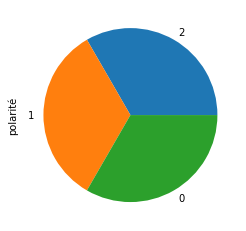

In [4]:
df.polarité.value_counts().plot.pie()
#df.value_counts()

In [5]:
import numpy as np
import pandas as pd
zero=pd.DataFrame([0 for x in range(140000)])
un=pd.DataFrame([1 for x in range(140000)])
deux =pd.DataFrame([2 for x in range(140000)])
zero.shape

(140000, 1)

In [6]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import shelve
import gensim
import pickle
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#df_polarité=pd.concat([zero,un,deux])
#df_tweet=pd.concat([tw_neg,tw_neu,tw_pos])
#print(df_polarité.head)
#print(df_tweet.head)

#df_polarité.value_counts()

In [37]:
#dfsa=pd.concat([tw_neg,tw_neu,tw_pos])
#dfsa['polarité']=pd.concat([zero,un,deux])
#dfsa.columns=['tweets','polarité']

In [39]:
#dfsa.to_csv('/content/df_tweet.csv', sep = ',')

In [7]:
def preprocess_tweet_text(tweet):
  
    import re
    import contractions
    import string
    import nltk
    #tweet=str(tweet)
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # extend contractions
    tweet =contractions.fix(tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [8]:
len(df.tweets),type(df.tweets)

(420000, pandas.core.series.Series)

In [9]:
twt=pd.Series(np.array(df.tweets))
twt.columns=['tweets']
print(type(twt),len(twt))

twt

<class 'pandas.core.series.Series'> 420000


0         noooooooo #familyforce5 is not on trending top...
1         Ricky Hatton fall at ROUND 2. woah I cant beli...
2         Lisa_Veronica: is soooo tired, why can't I eve...
3         While less expensive than what Apple charges f...
4         I wond up selling this lens to a person that h...
                                ...                        
419995    You have to consider a lot of things and I can...
419996    New job, baby on the way, and house hunting ar...
419997             @ProudGamerTweet I rather average 32370 
419998    These headphones have a few issues. First, the...
419999    @ home studying for maths wooot ! im so going ...
Length: 420000, dtype: object

In [10]:
#!pip install contractions
import contractions

In [11]:
httpRegex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
tw=[None] * len(twt)
for i in range(len(twt)):
  tw[i] = re.sub(httpRegex, ' ', contractions.fix(str(twt[i])).lower().strip()).strip()
  


In [12]:
len(tw),tw

(420000,
 ['noooooooo familyforce5 is not on trending topics anymore me so saddd',
  'ricky hatton fall at round 2 woah i can not believe nice one pacquiao',
  'lisa veronica is soooo tired why can not i ever sleep before 5am grrrr have no time to be tired today',
  'while less expensive than what apple charges for their cable this product is still grossly overpriced',
  'i wond up selling this lens to a person that had come over to look at a body i was selling would i buy it again well i got mine used and paid 65 00 for it so probably i would i picked one of these up for shooting the moon not for any other reason here is some useful information on the lens first of all it is incredibly light my nikon 70 300 weighs more than this lens does second of all the t mount is simple to attach just turn it backwards on the lens and you will feel the threads line up then tighten it up most important this will work with all nikon f mount cameras however you need to understand that this is not a c

In [12]:
df.tweets

92707     noooooooo #familyforce5 is not on trending top...
363044    Ricky Hatton fall at ROUND 2. woah I cant beli...
113946    Lisa_Veronica: is soooo tired, why can't I eve...
265158    While less expensive than what Apple charges f...
231137    I wond up selling this lens to a person that h...
                                ...                        
259178    You have to consider a lot of things and I can...
365838    New job, baby on the way, and house hunting ar...
131932             @ProudGamerTweet I rather average 32370 
146867    These headphones have a few issues. First, the...
121958    @ home studying for maths wooot ! im so going ...
Name: tweets, Length: 420000, dtype: object

In [13]:
documents = [TweetTokenizer().tokenize(_text) for _text in tw]


In [14]:
len(documents),type(documents)

(420000, list)

In [ ]:
stop_words = set(stopwords.words('english'))
doc_without_sw = [w for w in documents if not str(w) in stop_words]
stop_words
#doc_without_sw

True

# word to vec
build my words  embedding model

In [15]:
W2V_SIZE = 256
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                                window=W2V_WINDOW, 
                                                min_count=W2V_MIN_COUNT, 
                                                workers=8)

In [16]:
model.build_vocab(documents)
words = model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)
words

Vocab size 27747


dict_keys(['noooooooo', 'familyforce', '5', 'is', 'not', 'on', 'trending', 'topics', 'anymore', 'me', 'so', 'ricky', 'hatton', 'fall', 'at', 'round', '2', 'woah', 'i', 'can', 'believe', 'nice', 'one', 'pacquiao', 'lisa', 'veronica', 'soooo', 'tired', 'why', 'ever', 'sleep', 'before', '5am', 'grrrr', 'have', 'no', 'time', 'to', 'be', 'today', 'while', 'less', 'expensive', 'than', 'what', 'apple', 'charges', 'for', 'their', 'cable', 'this', 'product', 'still', 'grossly', 'overpriced', 'up', 'selling', 'lens', 'a', 'person', 'that', 'had', 'come', 'over', 'look', 'body', 'was', 'would', 'buy', 'it', 'again', 'well', 'got', 'mine', 'used', 'and', 'paid', '65', '00', 'probably', 'picked', 'of', 'these', 'shooting', 'the', 'moon', 'any', 'other', 'reason', 'here', 'some', 'useful', 'information', 'first', 'all', 'incredibly', 'light', 'my', 'nikon', '70', '300', 'weighs', 'more', 'does', 'second', 't', 'mount', 'simple', 'attach', 'just', 'turn', 'backwards', 'you', 'will', 'feel', 'threads'

In [51]:
print("Training w2v model")
#model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)


Training w2v model


(589501936, 780498944)

In [124]:
model = Word2Vec(documents,size=W2V_SIZE,
                 window=W2V_WINDOW, 
                 min_count=W2V_MIN_COUNT, 
                 workers=8)

In [125]:
model.save('mc_model.w2v')
print("mc W2V model generated and saved")

mc W2V model generated and saved


In [17]:

wvmodel = Word2Vec.load('mc_model.w2v')

In [18]:
wvmodel.wv.most_similar('yes')

[('yeah', 0.5055795907974243),
 ('indeed', 0.49245259165763855),
 ('yea', 0.4372626543045044),
 ('yeh', 0.3785240054130554),
 ('uh', 0.37840813398361206),
 ('yess', 0.3670107126235962),
 ('yep', 0.3616962432861328),
 ('btw', 0.35586637258529663),
 ('yup', 0.3526904582977295),
 ('madam', 0.34980350732803345)]

In [60]:
wvmodel['man'].shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(256,)

# tokenisation

In [20]:
xtrain,ytrain,xtest,ytest=train_test_split(tw,df.polarité,random_state=42)

In [21]:
print("xtrain",type(xtrain),len(xtrain))
print("ytrain",type(ytrain),len(ytrain))
print("xtest",type(xtest),len(xtest))
print("ytest",type(ytest),len(ytest))

xtrain <class 'list'> 315000
ytrain <class 'list'> 105000
xtest <class 'pandas.core.series.Series'> 315000
ytest <class 'pandas.core.series.Series'> 105000


In [ ]:

#encoder = LabelEncoder()
#y_train=encoder.fit_transform(ytrain)
#y_test = encoder.fit_transform(ytest)
y_train = np.array(ytrain)

In [ ]:

y_train = np.array(ytrain).reshape(-1,1)
y_test = np.array(ytest).reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

In [153]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xtrain)

vocab_size = len(tokenizer.word_index) + 1


In [155]:
tokenizer.word_index.items()

dict_items([('the', 1), ('i', 2), ('to', 3), ('it', 4), ('a', 5), ('and', 6), ('is', 7), ('not', 8), ('of', 9), ('for', 10), ('you', 11), ('this', 12), ('that', 13), ('in', 14), ('my', 15), ('on', 16), ('but', 17), ('have', 18), ('with', 19), ('was', 20), ('are', 21), ('as', 22), ('so', 23), ('be', 24), ('if', 25), ('do', 26), ('will', 27), ('am', 28), ('can', 29), ('at', 30), ('or', 31), ('would', 32), ('just', 33), ('one', 34), ('good', 35), ('up', 36), ('they', 37), ('me', 38), ('like', 39), ('when', 40), ('from', 41), ('all', 42), ('out', 43), ('get', 44), ('use', 45), ('an', 46), ('your', 47), ('very', 48), ('does', 49), ('no', 50), ('had', 51), ('there', 52), ('more', 53), ('has', 54), ('work', 55), ('about', 56), ('only', 57), ('well', 58), ('what', 59), ('did', 60), ('than', 61), ('s', 62), ('some', 63), ('time', 64), ('which', 65), ('other', 66), ('these', 67), ('really', 68), ('great', 69), ('much', 70), ('2', 71), ('them', 72), ('camera', 73), ('case', 74), ('now', 75), ('be

In [156]:
vocab_size

163411

# embedding layer

In [144]:

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word in documents:
  if word in wvmodel.wv:
    embedding_matrix[words] = wvmodel.wv[word]
print(embedding_matrix.shape)


print("Creating embedding layer")
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=70, trainable=False)

TypeError: ignored

# wordcloud

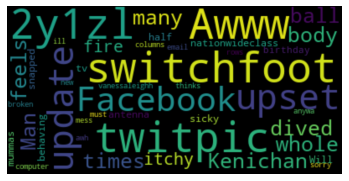

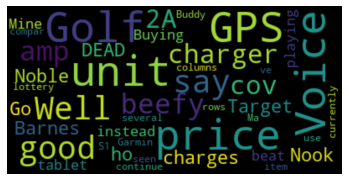

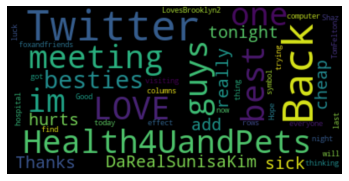

In [67]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

# Display the generated image:


for i in [tw_neg,tw_neu,tw_pos]:
  wordcloud = WordCloud(max_font_size=50, max_words=140000, background_color="black").generate(str(i))
  plt.figure()
  plt.imshow(wordcloud, interpolation="gaussian")
  plt.axis("off")
  plt.show()

In [14]:
'''import pip
from pip._internal import main as m

pkgs = ['numpy', 'contractions','pandas']
for package in pkgs:#
    try:
        import package
    except ImportError:
        pip.main(['install', package])'''

"import pip\nfrom pip._internal import main as m\n\npkgs = ['numpy', 'contractions','pandas']\nfor package in pkgs:#\n    try:\n        import package\n    except ImportError:\n        pip.main(['install', package])"